# Importing modules to be used

We start by importing the various modules we will be needing for our analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
import statsmodels.api as sm
import seaborn as sns

#  Importing Data Sets using Pandas

we load the data set by name 'dhsdata' into a dataframe named data

In [2]:
data=pd.read_csv('dhsdata.csv')
data.head()

,HV000,hhid,perweight,HV025,brsfedcat,kidsex,kidcurage,momAge,ageHHgroup,kidtwin,educlvl,momAgeGroup,marstat,religion,hwbmizwhocat,hhWealth,HHSize,HHSizeCat,diarrhea
0,Burkina Faso (2010),1 4,0.730967,Rural,still breastfeeding,female,less than 1 year,26,50+ years,single birth,no education,25-34 years,married,traditional,NaN,Poor,7,6 to 7,No
1,Burkina Faso (2010),1 4,0.730967,Rural,ever breastfed,female,4 years,26,50+ years,single birth,no education,25-34 years,married,traditional,NaN,Poor,7,6 to 7,No
2,Burkina Faso (2010),10 1,1.078176,Rural,still breastfeeding,female,1 year,15,25-34 years,single birth,no education,10-24 years,married,muslim,NaN,Poor,4,4 to 5,No
3,Burkina Faso (2010),10 1,1.078176,Rural,ever breastfed,female,4 years,15,25-34 years,single birth,no education,10-24 years,married,muslim,NaN,Poor,4,4 to 5,No
4,Burkina Faso (2010),10 3,1.078176,Rural,ever breastfed,female,2 years,11,<25 years,single birth,no education,10-24 years,married,christian,NaN,Poor,4,4 to 5,No


#  Changing column names to become meaningful

In [3]:
data.columns=['Country','Household id','Survey weights','Residency','Child breastfeeding status','Child gender','Child age',"Mother's age",'Age of head of household','Multiple births',"Mother's education","Mother's age group","Mother's marital status",'Religion',"Mother's BMI status",'Household wealth status','Household size continuous','Household size categorized','Diarrhea']
data.columns

Index(['Country', 'Household id', 'Survey weights', 'Residency',
       'Child breastfeeding status', 'Child gender', 'Child age',
       'Mother's age', 'Age of head of household', 'Multiple births',
       'Mother's education', 'Mother's age group', 'Mother's marital status',
       'Religion', 'Mother's BMI status', 'Household wealth status',
       'Household size continuous', 'Household size categorized', 'Diarrhea'],
      dtype='object')

# Checking to see if there are any missing values or NaN

In [4]:
data.isna().sum()

Country                           0
Household id                      0
Survey weights                    0
Residency                         0
Child breastfeeding status    65019
Child gender                      0
Child age                         0
Mother's age                      0
Age of head of household         38
Multiple births                   0
Mother's education                5
Mother's age group                0
Mother's marital status           2
Religion                       3532
Mother's BMI status           50239
Household wealth status           0
Household size continuous         0
Household size categorized        0
Diarrhea                       1045
dtype: int64

As we can see above, we have 65019 NaN values for Child breastfeeding status, 3532 for Religion,50239 for Mother's BMI status  and 1045 for Diarrhea

In [5]:
np.shape(data) #checking to see if removing the rows containing NaN will have a massive impact on our data and since the NaN forms a rather large proportion of the entire data so we would have to adjust that 

(84264, 19)

# Cleaning and correcting all missing values or NaN in the data

In [6]:
#data=data.fillna('Not Applicable')
#data.head()

In [7]:
data.at[0,'Child age']= '0 year'

In [8]:
data['Child age'] = data['Child age'].str.replace('year','') 
data['Child age'] = data['Child age'].str.replace('s','')
data['Child age'] = data['Child age'].str.replace('le than 1','0')
data['Child age'].astype(int)  
data['Child age'] = pd.to_numeric(data['Child age'])
data['Child age'].dtype

dtype('int64')

In [9]:
data.isna().sum()

Country                           0
Household id                      0
Survey weights                    0
Residency                         0
Child breastfeeding status    65019
Child gender                      0
Child age                         0
Mother's age                      0
Age of head of household         38
Multiple births                   0
Mother's education                5
Mother's age group                0
Mother's marital status           2
Religion                       3532
Mother's BMI status           50239
Household wealth status           0
Household size continuous         0
Household size categorized        0
Diarrhea                       1045
dtype: int64

# Exploring the data to see what kind of data types we are working with

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84264 entries, 0 to 84263
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     84264 non-null  object 
 1   Household id                84264 non-null  object 
 2   Survey weights              84264 non-null  float64
 3   Residency                   84264 non-null  object 
 4   Child breastfeeding status  19245 non-null  object 
 5   Child gender                84264 non-null  object 
 6   Child age                   84264 non-null  int64  
 7   Mother's age                84264 non-null  int64  
 8   Age of head of household    84226 non-null  object 
 9   Multiple births             84264 non-null  object 
 10  Mother's education          84259 non-null  object 
 11  Mother's age group          84264 non-null  object 
 12  Mother's marital status     84262 non-null  object 
 13  Religion                    807

#  Specifying a subset of the data to work with

In [11]:
sub_data= data['Country'] == 'Burkina Faso (2010)'
sub_Faso=data[sub_data]
sub_Faso.head()

,Country,Household id,Survey weights,Residency,Child breastfeeding status,Child gender,Child age,Mother's age,Age of head of household,Multiple births,Mother's education,Mother's age group,Mother's marital status,Religion,Mother's BMI status,Household wealth status,Household size continuous,Household size categorized,Diarrhea
0,Burkina Faso (2010),1 4,0.730967,Rural,still breastfeeding,female,0,26,50+ years,single birth,no education,25-34 years,married,traditional,NaN,Poor,7,6 to 7,No
1,Burkina Faso (2010),1 4,0.730967,Rural,ever breastfed,female,4,26,50+ years,single birth,no education,25-34 years,married,traditional,NaN,Poor,7,6 to 7,No
2,Burkina Faso (2010),10 1,1.078176,Rural,still breastfeeding,female,1,15,25-34 years,single birth,no education,10-24 years,married,muslim,NaN,Poor,4,4 to 5,No
3,Burkina Faso (2010),10 1,1.078176,Rural,ever breastfed,female,4,15,25-34 years,single birth,no education,10-24 years,married,muslim,NaN,Poor,4,4 to 5,No
4,Burkina Faso (2010),10 3,1.078176,Rural,ever breastfed,female,2,11,<25 years,single birth,no education,10-24 years,married,christian,NaN,Poor,4,4 to 5,No


#  Exploring the PDFs

In [12]:
sub_Faso.describe(include='all')

,Country,Household id,Survey weights,Residency,Child breastfeeding status,Child gender,Child age,Mother's age,Age of head of household,Multiple births,Mother's education,Mother's age group,Mother's marital status,Religion,Mother's BMI status,Household wealth status,Household size continuous,Household size categorized,Diarrhea
count,13716,13716,13716.000000,13716,13654,13716,13716.000000,13716.000000,13715,13716,13711,13716,13714,13677,6532,13716,13716.000000,13716,13621
unique,1,8382,NaN,2,3,2,NaN,NaN,4,2,4,3,3,4,4,3,NaN,5,2
top,Burkina Faso (2010),436 9,NaN,Rural,ever breastfed,male,NaN,NaN,35-49 years,single birth,no education,10-24 years,married,muslim,normal,Poor,NaN,8+,No
freq,13716,8,NaN,10671,7503,6932,NaN,NaN,6047,13303,11361,10038,12801,8518,5396,5462,NaN,5835,11590
mean,NaN,NaN,1.020804,NaN,NaN,NaN,1.944955,20.251312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.791922,NaN,NaN
std,NaN,NaN,0.436741,NaN,NaN,NaN,1.414972,6.858184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.122939,NaN,NaN
min,NaN,NaN,0.203181,NaN,NaN,NaN,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,0.695431,NaN,NaN,NaN,1.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN
50%,NaN,NaN,0.991436,NaN,NaN,NaN,2.000000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN
75%,NaN,NaN,1.312710,NaN,NaN,NaN,3.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN


<AxesSubplot:xlabel='Household size continuous', ylabel='count'>

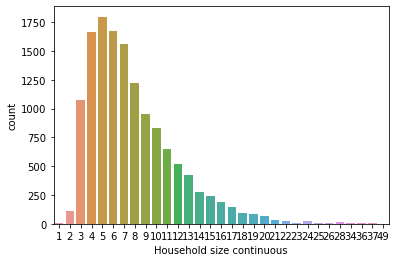

In [13]:
sns.countplot(sub_Faso['Household size continuous'])

# Dealing with outliers

In [14]:
q=sub_Faso['Household size continuous'].quantile(0.99)
new_data=sub_Faso[sub_Faso['Household size continuous'] < q]
new_data.describe(include='all')

,Country,Household id,Survey weights,Residency,Child breastfeeding status,Child gender,Child age,Mother's age,Age of head of household,Multiple births,Mother's education,Mother's age group,Mother's marital status,Religion,Mother's BMI status,Household wealth status,Household size continuous,Household size categorized,Diarrhea
count,13570,13570,13570.000000,13570,13508,13570,13570.000000,13570.000000,13569,13570,13565,13570,13568,13531,6493,13570,13570.000000,13570,13475
unique,1,8345,NaN,2,3,2,NaN,NaN,4,2,4,3,3,4,4,3,NaN,5,2
top,Burkina Faso (2010),522 7,NaN,Rural,ever breastfed,male,NaN,NaN,35-49 years,single birth,no education,10-24 years,married,muslim,normal,Poor,NaN,8+,No
freq,13570,8,NaN,10554,7419,6859,NaN,NaN,6013,13159,11237,9963,12669,8439,5361,5432,NaN,5689,11473
mean,NaN,NaN,1.021920,NaN,NaN,NaN,1.945099,20.217907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.603832,NaN,NaN
std,NaN,NaN,0.436616,NaN,NaN,NaN,1.414060,6.844345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.682956,NaN,NaN
min,NaN,NaN,0.203181,NaN,NaN,NaN,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,0.700944,NaN,NaN,NaN,1.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN
50%,NaN,NaN,0.991551,NaN,NaN,NaN,2.000000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN
75%,NaN,NaN,1.313719,NaN,NaN,NaN,3.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN


<AxesSubplot:xlabel='Household size continuous', ylabel='count'>

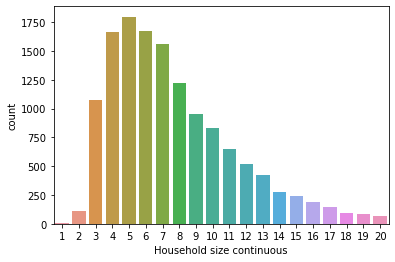

In [15]:
sns.countplot(new_data['Household size continuous'])

<AxesSubplot:xlabel='Survey weights', ylabel='Density'>

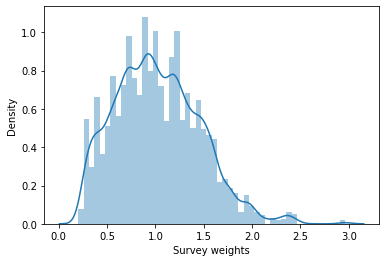

In [16]:
sns.distplot(new_data['Survey weights'])

<AxesSubplot:xlabel='Child age', ylabel='Density'>

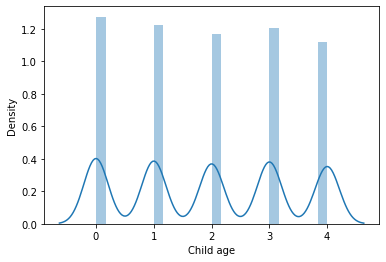

In [17]:
sns.distplot(new_data['Child age'])

In [18]:
data_cleaned=new_data.reset_index(drop=True)
data_cleaned=data_cleaned.drop(['Household id','Age of head of household','Mother\'s age group','Religion','Household size categorized'],axis=1)

In [19]:
data_cleaned.head()

,Country,Survey weights,Residency,Child breastfeeding status,Child gender,Child age,Mother's age,Multiple births,Mother's education,Mother's marital status,Mother's BMI status,Household wealth status,Household size continuous,Diarrhea
0,Burkina Faso (2010),0.730967,Rural,still breastfeeding,female,0,26,single birth,no education,married,NaN,Poor,7,No
1,Burkina Faso (2010),0.730967,Rural,ever breastfed,female,4,26,single birth,no education,married,NaN,Poor,7,No
2,Burkina Faso (2010),1.078176,Rural,still breastfeeding,female,1,15,single birth,no education,married,NaN,Poor,4,No
3,Burkina Faso (2010),1.078176,Rural,ever breastfed,female,4,15,single birth,no education,married,NaN,Poor,4,No
4,Burkina Faso (2010),1.078176,Rural,ever breastfed,female,2,11,single birth,no education,married,NaN,Poor,4,No


# Mapping

In [20]:
data_cleaned['Wealth']=data_cleaned['Household wealth status'].map({'Poor':0,'Middle':1,'Rich':2})
data_cleaned=data_cleaned.drop('Household wealth status',axis=1)

data_cleaned['Mother education']=data_cleaned['Mother\'s education'].map({'higher':3, 'no education':0, 'primary':1, 'secondary':2})
data_cleaned=data_cleaned.drop('Mother\'s education',axis=1)

data_cleaned['Child\'s gender']=data_cleaned['Child gender'].map({'female':0,'male':1})
data_cleaned=data_cleaned.drop('Child gender',axis=1)

data_cleaned['Mother BMI status']=data_cleaned['Mother\'s BMI status'].map({'normal':1, 'obese':0, 'overweight':0, 'thin':0})
data_cleaned=data_cleaned.drop('Mother\'s BMI status',axis=1)

data_cleaned['breastfeeding']=data_cleaned['Child breastfeeding status'].map({'still breastfeeding':1,'ever breastfed':1,'never breastfed':0})
data_cleaned=data_cleaned.drop('Child breastfeeding status',axis=1)

data_cleaned['Married']=data_cleaned['Mother\'s marital status'].map({'married':1,'never married':0, 'others':0})
data_cleaned=data_cleaned.drop('Mother\'s marital status',axis=1)

data_cleaned['Rural']=data_cleaned['Residency'].map({'Rural':1,'Urban':0})
data_cleaned=data_cleaned.drop('Residency',axis=1)

data_cleaned['diarrhea']=data_cleaned['Diarrhea'].map({'Yes':1,'No':0})
data_cleaned=data_cleaned.drop('Diarrhea',axis=1)



data_cleaned

,Country,Survey weights,Child age,Mother's age,Multiple births,Household size continuous,Wealth,Mother education,Child's gender,Mother BMI status,breastfeeding,Married,Rural,diarrhea
0,Burkina Faso (2010),0.730967,0,26,single birth,7,0,0.0,0,NaN,1.0,1.0,1,0.0
1,Burkina Faso (2010),0.730967,4,26,single birth,7,0,0.0,0,NaN,1.0,1.0,1,0.0
2,Burkina Faso (2010),1.078176,1,15,single birth,4,0,0.0,0,NaN,1.0,1.0,1,0.0
3,Burkina Faso (2010),1.078176,4,15,single birth,4,0,0.0,0,NaN,1.0,1.0,1,0.0
4,Burkina Faso (2010),1.078176,2,11,single birth,4,0,0.0,0,NaN,1.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13565,Burkina Faso (2010),0.578507,1,25,single birth,7,1,0.0,0,0.0,1.0,1.0,0,0.0
13566,Burkina Faso (2010),0.578507,4,25,single birth,7,1,0.0,1,1.0,1.0,1.0,0,0.0
13567,Burkina Faso (2010),0.578507,4,22,single birth,4,0,0.0,0,NaN,1.0,1.0,0,0.0
13568,Burkina Faso (2010),0.578507,2,18,single birth,4,1,0.0,1,1.0,1.0,1.0,0,0.0


# Explore some more

<AxesSubplot:xlabel='Mother BMI status', ylabel='count'>

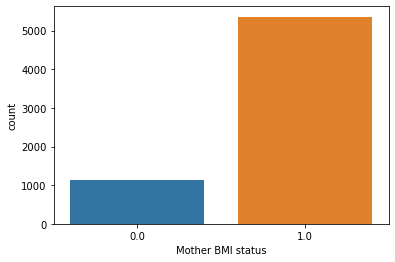

In [21]:
sns.countplot(data_cleaned['Mother BMI status'])

<AxesSubplot:xlabel="Child's gender", ylabel='count'>

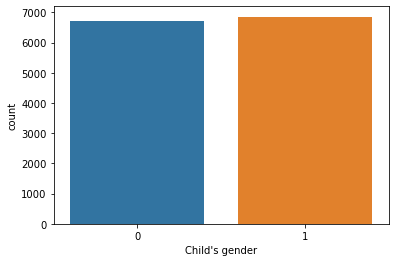

In [22]:
sns.countplot(data_cleaned['Child\'s gender'])

<AxesSubplot:xlabel="Mother's age", ylabel='count'>

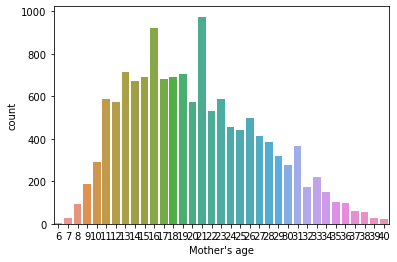

In [23]:
sns.countplot(data_cleaned['Mother\'s age'])

In [24]:
data_cleaned.isnull().sum()

Country                         0
Survey weights                  0
Child age                       0
Mother's age                    0
Multiple births                 0
Household size continuous       0
Wealth                          0
Mother education                5
Child's gender                  0
Mother BMI status            7077
breastfeeding                  62
Married                         2
Rural                           0
diarrhea                       95
dtype: int64

<AxesSubplot:xlabel='diarrhea', ylabel='count'>

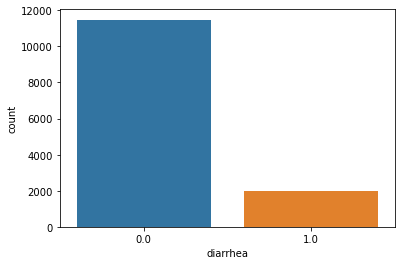

In [25]:
sns.countplot(data_cleaned['diarrhea'])

# Dummy encoding

In [26]:
dummy=pd.get_dummies(data_cleaned['Multiple births'])
dummy=pd.concat([data_cleaned, dummy], axis=1)
dummy.drop(['Multiple births','single birth'], inplace=True,axis=1)

dummy.head(10)

,Country,Survey weights,Child age,Mother's age,Household size continuous,Wealth,Mother education,Child's gender,Mother BMI status,breastfeeding,Married,Rural,diarrhea,multiple birth
0,Burkina Faso (2010),0.730967,0,26,7,0,0.0,0,NaN,1.0,1.0,1,0.0,0
1,Burkina Faso (2010),0.730967,4,26,7,0,0.0,0,NaN,1.0,1.0,1,0.0,0
2,Burkina Faso (2010),1.078176,1,15,4,0,0.0,0,NaN,1.0,1.0,1,0.0,0
3,Burkina Faso (2010),1.078176,4,15,4,0,0.0,0,NaN,1.0,1.0,1,0.0,0
4,Burkina Faso (2010),1.078176,2,11,4,0,0.0,0,NaN,1.0,1.0,1,0.0,0
5,Burkina Faso (2010),1.078176,3,19,4,0,0.0,0,1.0,1.0,1.0,1,0.0,0
6,Burkina Faso (2010),1.078176,0,27,8,0,0.0,1,NaN,1.0,1.0,1,0.0,0
7,Burkina Faso (2010),1.078176,3,27,8,0,0.0,1,NaN,1.0,1.0,1,0.0,0
8,Burkina Faso (2010),1.078176,2,13,5,0,1.0,0,1.0,1.0,1.0,1,0.0,0
9,Burkina Faso (2010),0.977534,2,13,4,2,1.0,1,NaN,1.0,1.0,0,0.0,0


In [27]:
dummy.columns

Index(['Country', 'Survey weights', 'Child age', 'Mother's age',
       'Household size continuous', 'Wealth', 'Mother education',
       'Child's gender', 'Mother BMI status', 'breastfeeding', 'Married',
       'Rural', 'diarrhea', 'multiple birth'],
      dtype='object')

In [28]:
dummy.isnull().sum()

Country                         0
Survey weights                  0
Child age                       0
Mother's age                    0
Household size continuous       0
Wealth                          0
Mother education                5
Child's gender                  0
Mother BMI status            7077
breastfeeding                  62
Married                         2
Rural                           0
diarrhea                       95
multiple birth                  0
dtype: int64

# Correcting missing values

In [29]:
dummy['Mother BMI status']=dummy['Mother BMI status'].fillna(dummy['Mother BMI status'].mode()[0])

In [30]:
dummy['breastfeeding']=dummy['breastfeeding'].fillna(dummy['breastfeeding'].mode()[0])

In [31]:
dummy['diarrhea']=dummy['diarrhea'].fillna(dummy['diarrhea'].mode()[0])

In [32]:
dummy['Mother education']=dummy['Mother education'].fillna(dummy['Mother education'].mode()[0])

In [33]:
dummy['Married']=dummy['Married'].fillna(dummy['Married'].mode()[0])

In [34]:
dummy.head()

,Country,Survey weights,Child age,Mother's age,Household size continuous,Wealth,Mother education,Child's gender,Mother BMI status,breastfeeding,Married,Rural,diarrhea,multiple birth
0,Burkina Faso (2010),0.730967,0,26,7,0,0.0,0,1.0,1.0,1.0,1,0.0,0
1,Burkina Faso (2010),0.730967,4,26,7,0,0.0,0,1.0,1.0,1.0,1,0.0,0
2,Burkina Faso (2010),1.078176,1,15,4,0,0.0,0,1.0,1.0,1.0,1,0.0,0
3,Burkina Faso (2010),1.078176,4,15,4,0,0.0,0,1.0,1.0,1.0,1,0.0,0
4,Burkina Faso (2010),1.078176,2,11,4,0,0.0,0,1.0,1.0,1.0,1,0.0,0


In [35]:
dummy.isnull().sum()

Country                      0
Survey weights               0
Child age                    0
Mother's age                 0
Household size continuous    0
Wealth                       0
Mother education             0
Child's gender               0
Mother BMI status            0
breastfeeding                0
Married                      0
Rural                        0
diarrhea                     0
multiple birth               0
dtype: int64

#  Linearity

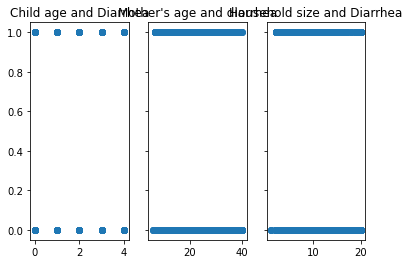

In [36]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True)
ax1.scatter(dummy['Child age'],dummy['diarrhea'])
ax1.set_title('Child age and Diarrhea')
ax2.scatter(dummy['Mother\'s age'],dummy['diarrhea'])
ax2.set_title('Mother\'s age and diarrhea')
ax3.scatter(dummy['Household size continuous'],dummy['diarrhea'])
ax3.set_title('Household size and Diarrhea')
plt.show()

# Sampling since the data is heavily unbalanced

In [37]:
d1=dummy[dummy.diarrhea==1]
d0=dummy[dummy.diarrhea==0]

In [38]:
d1.shape

(2002, 14)

In [39]:
d0.shape

(11568, 14)

In [40]:
d0_sample=d0.sample(n=2500)

In [41]:
new=pd.concat([d0_sample,d1],axis=0)

In [42]:
new.head()

,Country,Survey weights,Child age,Mother's age,Household size continuous,Wealth,Mother education,Child's gender,Mother BMI status,breastfeeding,Married,Rural,diarrhea,multiple birth
4088,Burkina Faso (2010),1.218532,1,14,3,0,0.0,1,1.0,1.0,1.0,1,0.0,0
8971,Burkina Faso (2010),1.257122,1,20,7,2,0.0,0,1.0,1.0,1.0,1,0.0,0
6957,Burkina Faso (2010),0.302848,4,31,10,0,0.0,0,1.0,1.0,1.0,0,0.0,0
2885,Burkina Faso (2010),1.606223,1,27,15,0,0.0,1,1.0,1.0,1.0,1,0.0,0
1390,Burkina Faso (2010),1.235703,2,20,7,1,0.0,1,1.0,1.0,1.0,1,0.0,0


In [43]:
new.shape

(4502, 14)

<AxesSubplot:>

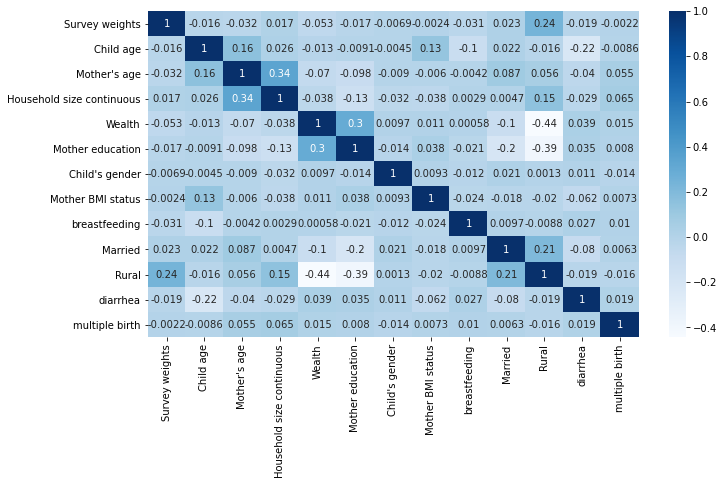

In [44]:
correlation=new.corr()
plt.figure(figsize=(11,6))
sns.heatmap(correlation,annot=True,cmap='Blues')

# Declaring our variables

In [45]:
x=new[['Survey weights', 'Child age', 'Mother\'s age',
       'Household size continuous', 'Wealth', 'Mother education',
       'Child\'s gender', 'Mother BMI status', 'breastfeeding', 'Married',
       'Rural', 'multiple birth']]
y=new['diarrhea']

# Split into training and testing data

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42,stratify=y)

# Feature scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
ss=StandardScaler()

In [49]:
ss.fit(x_train)

StandardScaler()

In [50]:
x_train=ss.transform(x_train)
x_test=ss.transform(x_test)

# Logistic Regression

# Fitting our model

In [51]:
from sklearn.linear_model import LogisticRegression
ml=LogisticRegression()
ml.fit(x_train,y_train)

LogisticRegression()

# Prediction

In [52]:
predictions=ml.predict(x_test)
predictions

array([0., 1., 0., ..., 0., 0., 0.])

In [53]:
compare=pd.DataFrame({'Actual':y_test,'Predicted':predictions})
compare

,Actual,Predicted
1789,0.0,0.0
2786,0.0,1.0
5032,1.0,0.0
5601,1.0,0.0
7103,1.0,0.0
...,...,...
9516,0.0,0.0
5686,1.0,0.0
9948,0.0,0.0
4514,0.0,0.0


# Classification Report

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.59      0.70      0.64       750
         1.0       0.52      0.40      0.45       601

    accuracy                           0.57      1351
   macro avg       0.56      0.55      0.55      1351
weighted avg       0.56      0.57      0.56      1351



# Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix
PRED=pd.DataFrame(confusion_matrix(y_test, predictions))
PRED.columns=['Predicted 0','Predicted 1']
PRED=PRED.rename(index={0:'Actual 0',1:'Actual 1'})
PRED

,Predicted 0,Predicted 1
Actual 0,528,222
Actual 1,360,241


In [56]:
y_train.value_counts(normalize=True)

0.0    0.555379
1.0    0.444621
Name: diarrhea, dtype: float64

In [57]:
ml.predict(np.array([[0.730967,4,24,1,0.0,1,1.0,1,0,1.0,1.0,1]]))

array([0.])

# Support Vector Classifier

In [58]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [59]:
pre=svc.predict(x_test)
pre

array([0., 1., 0., ..., 0., 0., 1.])

In [60]:
comp=pd.DataFrame({'Actual':y_test,'Predicted':pre})
comp

,Actual,Predicted
1789,0.0,0.0
2786,0.0,1.0
5032,1.0,0.0
5601,1.0,0.0
7103,1.0,0.0
...,...,...
9516,0.0,1.0
5686,1.0,0.0
9948,0.0,0.0
4514,0.0,0.0


# Classification Report

In [61]:
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

         0.0       0.60      0.74      0.66       750
         1.0       0.53      0.38      0.44       601

    accuracy                           0.58      1351
   macro avg       0.56      0.56      0.55      1351
weighted avg       0.57      0.58      0.56      1351



# Confusion Matrix

In [62]:
PRE=pd.DataFrame(confusion_matrix(y_test, pre))
PRE.columns=['Predicted 0','Predicted 1']
PRE=PRE.rename(index={0:'Actual 0',1:'Actual 1'})
PRE

,Predicted 0,Predicted 1
Actual 0,552,198
Actual 1,375,226


# Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

# Predict

In [64]:
y_pre=model.predict(x_test)
y_pre

array([1., 1., 0., ..., 1., 0., 0.])

# Comparing values

In [65]:
com=pd.DataFrame({'Actual':y_test,'Predicted':y_pre})
com

,Actual,Predicted
1789,0.0,1.0
2786,0.0,1.0
5032,1.0,0.0
5601,1.0,0.0
7103,1.0,0.0
...,...,...
9516,0.0,1.0
5686,1.0,0.0
9948,0.0,1.0
4514,0.0,0.0


# Classification Report

In [66]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

         0.0       0.60      0.57      0.59       750
         1.0       0.49      0.52      0.51       601

    accuracy                           0.55      1351
   macro avg       0.55      0.55      0.55      1351
weighted avg       0.55      0.55      0.55      1351



# Confusion Matrix

In [67]:
y_PRE=pd.DataFrame(confusion_matrix(y_test, y_pre))
y_PRE.columns=['Predicted 0','Predicted 1']
y_PRE=y_PRE.rename(index={0:'Actual 0',1:'Actual 1'})
y_PRE

,Predicted 0,Predicted 1
Actual 0,431,319
Actual 1,290,311
